<a href="https://colab.research.google.com/github/cpti372/molab_ys/blob/master/Classifying_Images_of_Clothing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 학습 데이터를 불러온다. **

In [8]:
!pip install -U tensorflow_datasets


Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (4.0.0)


2. 필요한 라이브러리 불러오기 


In [41]:
from __future__ import absolute_import, division, print_function, unicode_literals 

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


3. **데이터** **불러오기** 

In [10]:
fashion_mnist =keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [11]:
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle boot']

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

4. **데이터 전처리 시작하기** 
전처리 시 픽셀 값 [0,255]를 [0,1] 의 범위로 변경하는데 주목 

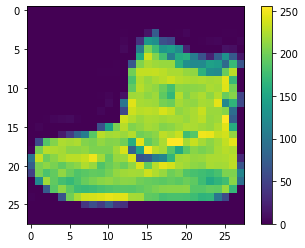

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images= train_images/255.0
test_images =test_images/255.0

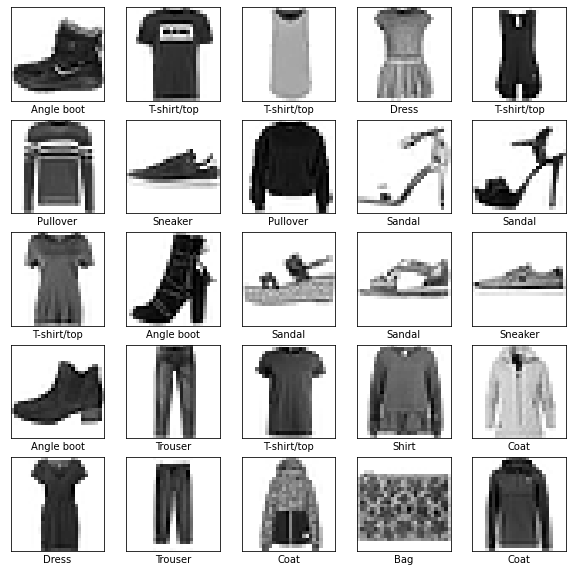

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

5. **신경망 모델 구성하기 **

층 설정하기 

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

모델 컴파일하기 

In [18]:
 model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

신경망 모델 훈련하기 
1. 훈련 데이터를 모델에 주입한다. 
2. 모델이 이미지와 레이블을 매핑하는 방법을 배운다. 
3. 테스트 세트에 대한 모델의 예측을 만든다. 이 예에서는 test_images 배열이다. 이게 test_labels 랑 맞는지 
4.model.fit하면 훈련데이터를 학습한다. 

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4998 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3803 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2973 - accuracy: 0.8907


테스트 세트에서의 성능 비교하기

In [20]:
test_loss , test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 0s - loss: 0.3549 - accuracy: 0.8743
0.8743000030517578


예측 만들기

In [21]:
predictions= model.predict(test_images)

In [22]:
predictions[0]

array([2.5384774e-05, 3.8852077e-06, 9.9707324e-07, 7.1460454e-06,
       3.5765512e-05, 1.3229222e-02, 1.7810559e-04, 8.8106625e-02,
       6.8435111e-05, 8.9834440e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

0번째 원소의 이미지, 예측, 신뢰도 점수 배열 

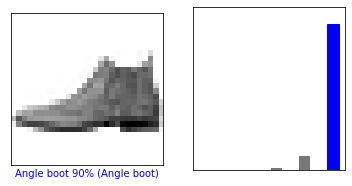

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

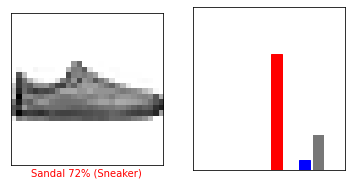

In [27]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

올바르게 예측된 레이블은 파란색, 아닌건 빨간색 
신뢰도 점수가 높아도 잘못 예측할 수 있다. 

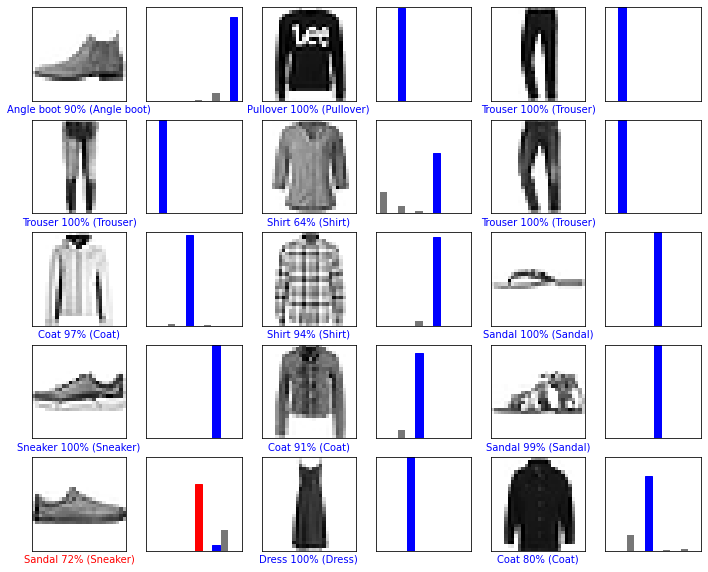

In [28]:
num_rows=5
num_cols=3
num_images=num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [29]:
img=test_images[0]
print(img.shape)

(28, 28)


# **CNN을 이용해서 분류해보자**

In [44]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist

In [45]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [48]:
input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)
num_classes = len(np.unique(y_train)) 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [49]:
inp = Input(shape=input_shape)
_ = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inp)
_ = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(_)
_ = MaxPool2D(pool_size=(2, 2))(_)
_ = Dropout(0.25)(_)
_ = Flatten()(_)
_ = Dense(units=128, activation='relu')(_)
_ = Dropout(0.2)(_)
_ = Dense(units=num_classes, activation='softmax')(_)
model = Model(inputs=inp, outputs=_)
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [31]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

**Model** **compile**

In [50]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(np.expand_dims(x_train, -1), y_train, batch_size=128, epochs=12, validation_split=0.3)

Epoch 1/12
329/329 [==============================] - 113s 343ms/step - loss: 0.5015 - accuracy: 0.8190 - val_loss: 0.3327 - val_accuracy: 0.8797
Epoch 2/12
329/329 [==============================] - 117s 355ms/step - loss: 0.3158 - accuracy: 0.8860 - val_loss: 0.2766 - val_accuracy: 0.8997
Epoch 3/12
329/329 [==============================] - 120s 363ms/step - loss: 0.2633 - accuracy: 0.9035 - val_loss: 0.2644 - val_accuracy: 0.9011
Epoch 4/12
329/329 [==============================] - 112s 341ms/step - loss: 0.2301 - accuracy: 0.9148 - val_loss: 0.2407 - val_accuracy: 0.9126
Epoch 5/12
329/329 [==============================] - 116s 351ms/step - loss: 0.1991 - accuracy: 0.9275 - val_loss: 0.2397 - val_accuracy: 0.9131
Epoch 6/12
329/329 [==============================] - 116s 351ms/step - loss: 0.1769 - accuracy: 0.9343 - val_loss: 0.2165 - val_accuracy: 0.9217
Epoch 7/12
329/329 [==============================] - 119s 360ms/step - loss: 0.1535 - accuracy: 0.9422 - val_loss: 0.2290 -

**Evaluation**

0.2721608579158783 0.9200000166893005


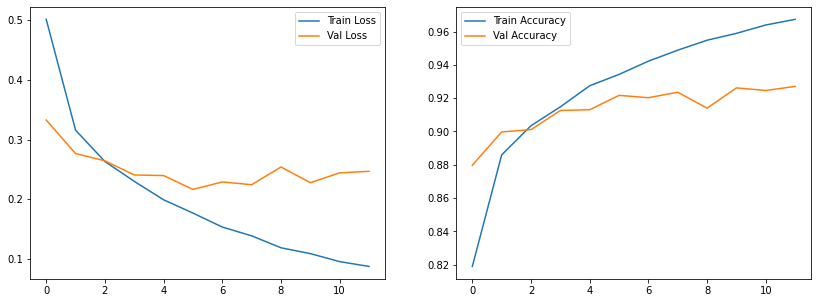

In [51]:
loss, accuracy = model.evaluate(np.expand_dims(x_test, -1), y_test, verbose=0)
print(loss, accuracy)
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
ax2.legend()